In [ ]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

1. Read the dataset to python environment


In [ ]:
data=pd.read_excel('/content/iris.xls')

In [ ]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# 2. Do the necessary pre-processing steps

In [ ]:
data.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

array([[<Axes: title={'center': 'SL'}>, <Axes: title={'center': 'SW'}>],
       [<Axes: title={'center': 'PL'}>, <Axes: title={'center': 'PW'}>]],
      dtype=object)

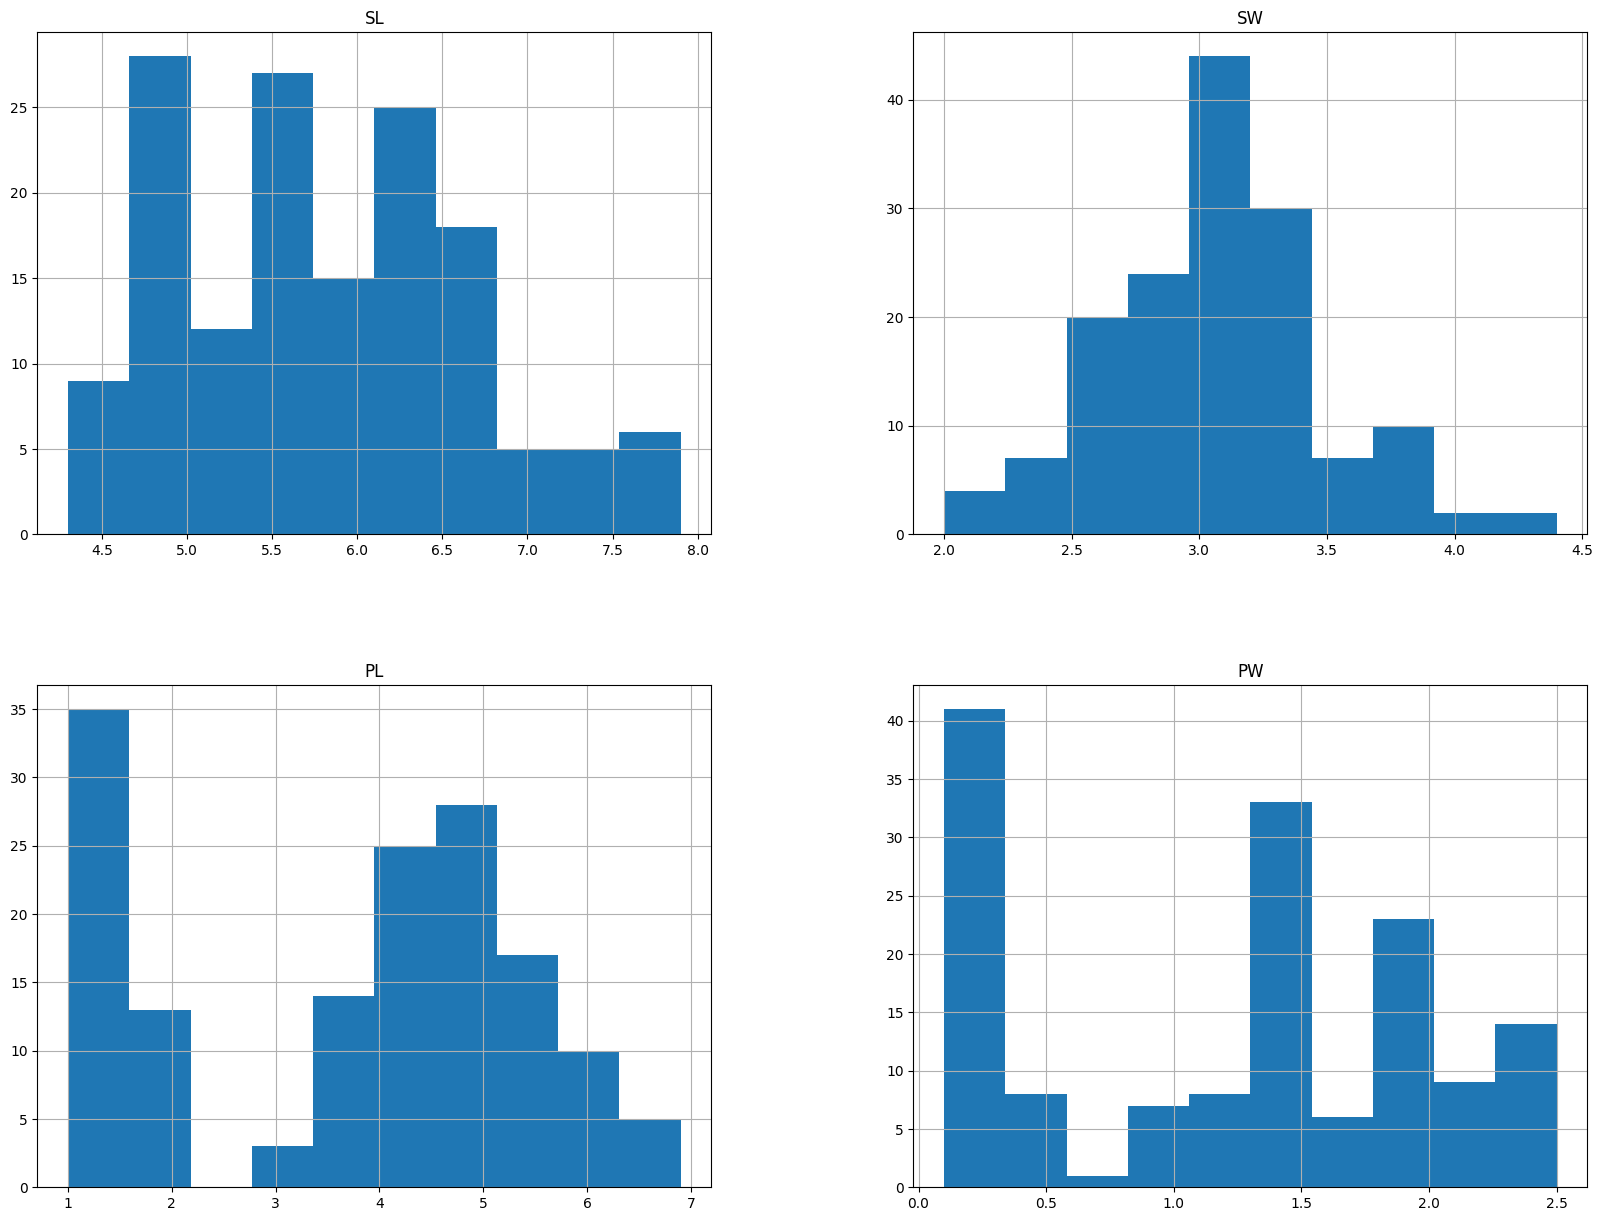

In [ ]:
freq_graph = data.select_dtypes(include='float64')
freq_graph.hist(figsize=(20, 15))

In [ ]:
data['SL'] = data['SL'].fillna(data['SL'].mode()[0])
data['SW'] = data['SW'].fillna(data['SW'].mode()[0])
data['PL'] = data['PL'].fillna(data['PL'].mean())

In [ ]:
data.isna().sum()


SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.816000,3.047333,3.756250,1.198667
std,0.828525,0.421995,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.700000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data1 = pd.get_dummies(data)

In [ ]:
data1

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
0,5.1,3.5,1.40000,0.2,1,0,0
1,4.9,3.0,1.40000,0.2,1,0,0
2,5.0,3.2,1.30000,0.2,1,0,0
3,4.6,3.1,1.50000,0.2,1,0,0
4,5.0,3.6,1.40000,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.20000,2.3,0,0,1
146,6.3,2.5,5.00000,1.9,0,0,1
147,6.5,3.0,3.75625,2.0,0,0,1
148,6.2,3.4,5.40000,2.3,0,0,1


<Axes: >

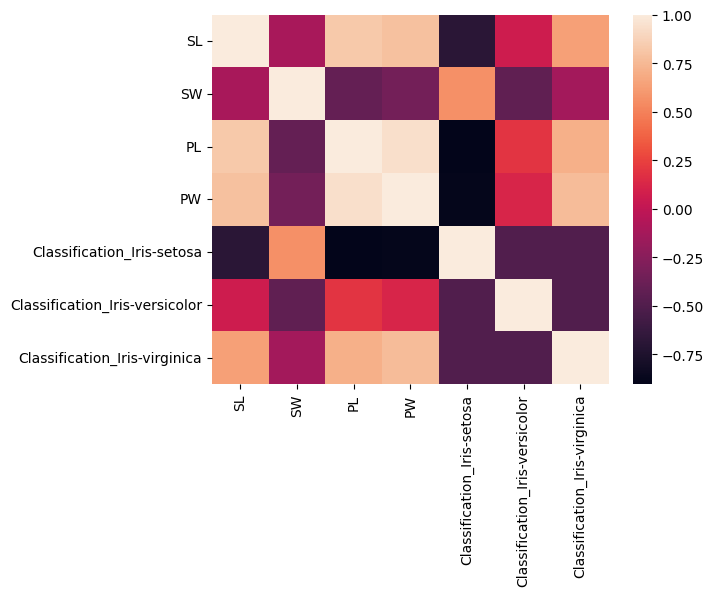

In [ ]:
sns.heatmap(data1.corr())

In [ ]:
data1.corr()

,SL,SW,PL,PW,Classification_Iris-setosa,Classification_Iris-versicolor,Classification_Iris-virginica
SL,1.000000,-0.114667,0.824923,0.785812,-0.691900,0.061654,0.630245
SW,-0.114667,1.000000,-0.411471,-0.338655,0.566018,-0.432639,-0.133378
PL,0.824923,-0.411471,1.000000,0.936389,-0.902943,0.195720,0.707223
PW,0.785812,-0.338655,0.936389,1.000000,-0.887510,0.118376,0.769134
Classification_Iris-setosa,-0.691900,0.566018,-0.902943,-0.887510,1.000000,-0.500000,-0.500000
Classification_Iris-versicolor,0.061654,-0.432639,0.195720,0.118376,-0.500000,1.000000,-0.500000
Classification_Iris-virginica,0.630245,-0.133378,0.707223,0.769134,-0.500000,-0.500000,1.000000


In [ ]:
y = data['Classification']
x = data.drop('Classification',axis=1)

In [ ]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [ ]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40000,0.2
1,4.9,3.0,1.40000,0.2
2,5.0,3.2,1.30000,0.2
3,4.6,3.1,1.50000,0.2
4,5.0,3.6,1.40000,0.2
...,...,...,...,...
145,6.7,3.0,5.20000,2.3
146,6.3,2.5,5.00000,1.9
147,6.5,3.0,3.75625,2.0
148,6.2,3.4,5.40000,2.3


 3)Find out which classification model gives the best result (try all the
classification algorithms discussed in the session)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test,=train_test_split(x,y,random_state=42,test_size=.25)

In [ ]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,random_state=42,test_size=.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg=LogisticRegression()

In [ ]:
x_train

,SL,SW,PL,PW
4,5.0,3.6,1.4,0.2
32,5.2,4.1,1.5,0.1
142,5.8,2.7,5.1,1.9
85,NaN,3.4,4.5,1.6
86,6.7,3.1,4.7,1.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,NaN,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [ ]:
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_log_pred=log_reg.predict(x_test)

In [ ]:
y_log_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test,y_log_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred, average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))


Accuracy : 0.9736842105263158
 Precision : 0.9736842105263158
Recall : 0.9736842105263158
F1 : 0.9736842105263158


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
confusion_matrix(y_test,y_log_pred)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_log_pred))
print(' Precision :',precision_score(y_test,y_log_pred, average='micro'))

print('Recall :',recall_score(y_test,y_log_pred, average='micro'))
print('F1 :',f1_score(y_test,y_log_pred, average='micro'))


Accuracy : 0.9736842105263158
 Precision : 0.9736842105263158
Recall : 0.9736842105263158
F1 : 0.9736842105263158


In [ ]:
# KNN

In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

metric_k = []

neighbors = np.arange(3, 15)


In [ ]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

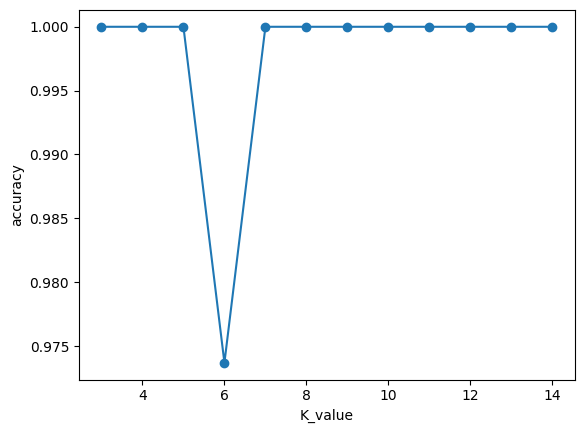

In [ ]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [ ]:
(y_test,y_pconfusion_matrixred_knn)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]])

In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred_knn))
print(' Precision :',precision_score(y_test,y_pred_knn, average='micro'))

print('Recall :',recall_score(y_test,y_pred_knn, average='micro'))
print('F1 :',f1_score(y_test,y_pred_knn, average='micro'))

Accuracy : 1.0
 Precision : 1.0
Recall : 1.0
F1 : 1.0


# SVC MODEL

In [ ]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred=sv_cl.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


In [ ]:
print('Accuracy :',accuracy_score(y_test,y_pred))
print(' Precision :',precision_score(y_test,y_pred,average='micro'))

print('Recall :',recall_score(y_test,y_pred,average='micro'))
print('F1 :',f1_score(y_test,y_pred,average='micro'))

Accuracy : 0.9736842105263158
 Precision : 0.9736842105263158
Recall : 0.9736842105263158
F1 : 0.9736842105263158


 The best model is KNN MODEL